# Machine Learning Camp
## Classification via Logistic Regression

## Agenda

* Linear Regression
* Multi-linear Regression
* Why linear regression doesn't work well for classification
* Logsitic Regression
* Soft-max



## Linear Regression

You are most likely familiar with the equation $$y = mx + b$$

You have been taught that a plot of the paired values of $(x,y)$ satisfiying this equation will form a line.  Furthermore, the slope of the line will be $m$ and the intercept $b$.



Let's a quick example.





In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd



### Example of lines

We will make three lines.

**Line 1**

Line one will have slope of $1$ and an intercept of $0$. That is, it's just $y = x$


**Line 2**

Line two will have slope of $3$ and an intercept of $2$. That is, it's $y = 3x + 2$


**Line 3**

Line two will have slope of $-\frac{1}{2}$ and an intercept of $2$. That is, it's $y = -\frac{1}{2}x + 2$



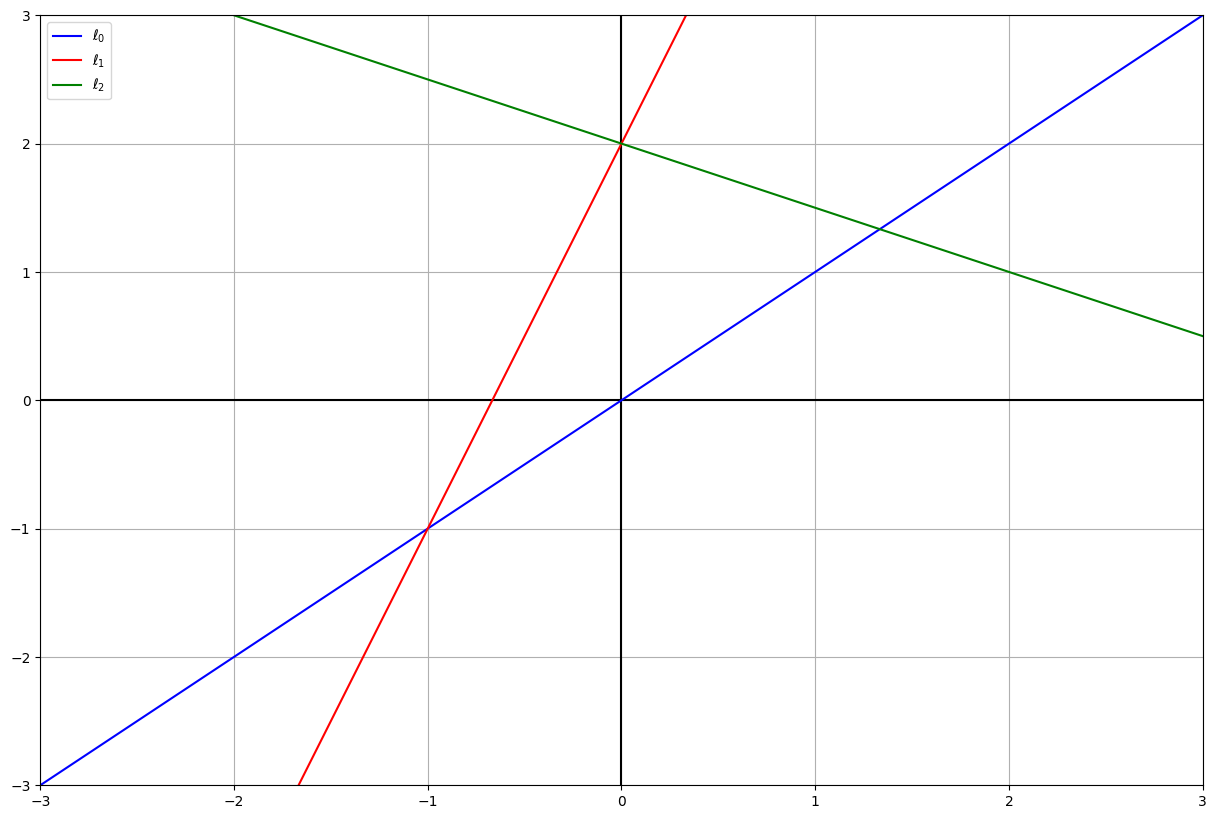

In [ ]:


# Line 1
m0 = 1
b0 = 0

# Line 2
m1 = 3
b1 = 2

#  Line 3
m2 = -1/2
b2 = 2

xvals = np.linspace(-4,4)  # These are the x value for plotting

y0 = m0*xvals + b0

y1 = m1*xvals + b1

y2 = m2*xvals + b2

plt.figure(figsize = (15,10))

plt.axhline(y=0, color='black')
plt.axvline(x=0, color='black')

plt.grid(True, which='both')
plt.plot(xvals, y0, label = "$\ell_0$", color = "blue")

plt.plot(xvals, y1, label = "$\ell_1$", color = "red")

plt.plot(xvals, y2, label = "$\ell_2$", color = "green")


plt.xlim(-3,3)
plt.ylim(-3,3)


plt.legend()
plt.show()





### Line fitting

This well understood relationship between $X$ and $Y$ leads to the most ubiquitous machine linear model of all, *Linear Regression*

The idea is of the model is that $X$ (the feature or indepedant variable) and $Y$ (the response or dependant variable) are linearly related save for some kind of small error.  

Specifically, in your stats class, this is written as

$$Y = \alpha + \beta X + \epsilon$$

where $\epsilon$ is some kind of error or random noise

#### Example


We will load some data on Automobiles.  Let's suppose we were interested in the relationship between mpg and (say) weight.



In [ ]:

Auto = pd.read_csv('https://raw.githubusercontent.com/sziccardi/MLCamp2025_DataRepository/main/Auto.csv')

Auto.head()


,name,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1


In [ ]:
Auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [ ]:
# Note we have no na's do deal with
Auto.isnull().sum(axis = 0)

,0
name,0
mpg,0
cylinders,0
displacement,0
horsepower,0
weight,0
acceleration,0
year,0
origin,0


**Exporing the data**


A quick plot can often help us see relationships.

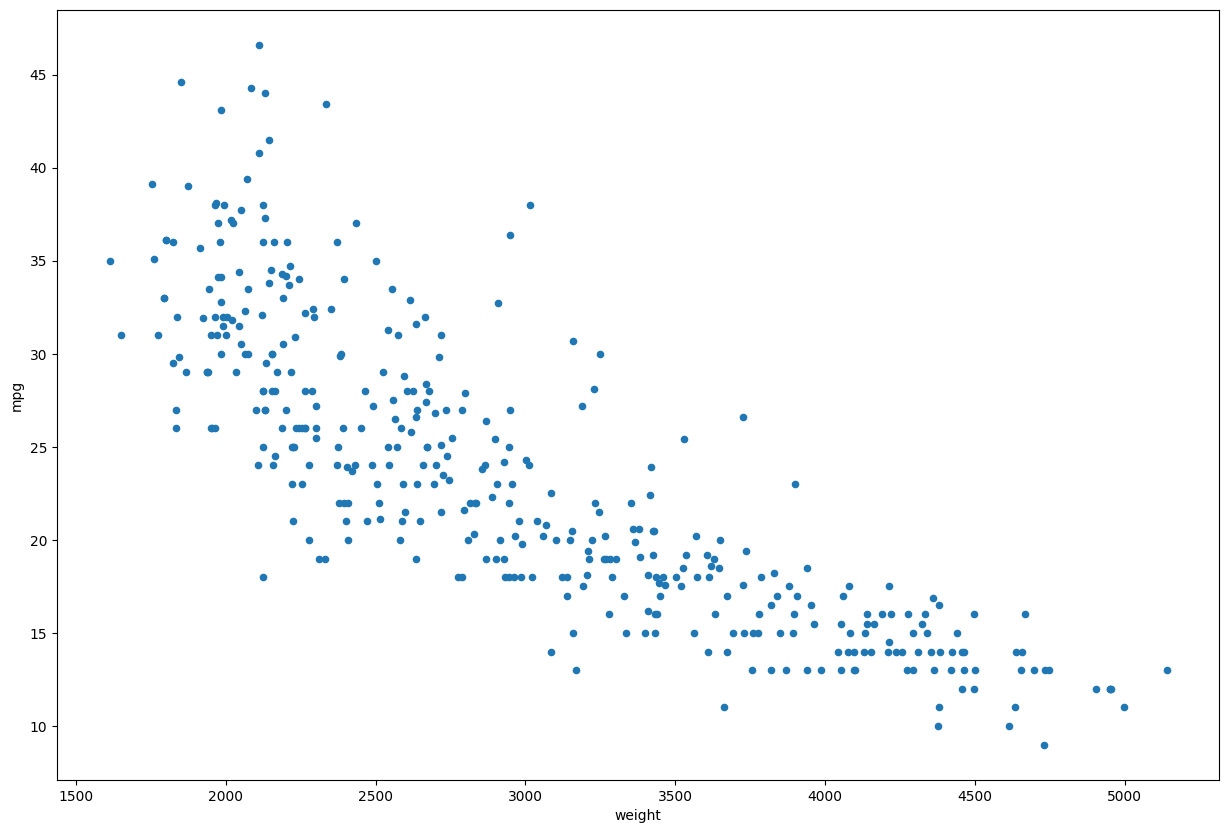

In [ ]:
Auto.plot.scatter('weight', 'mpg',figsize = (15,10))
plt.show()

And from this, we might attempt to fit a line to show the relationship.  We can do this with sklearn





In [ ]:
from sklearn.linear_model import LinearRegression


X = Auto["weight"].values.reshape(-1, 1)
Y = Auto["mpg"].values.reshape(-1, 1)
linear_regressor1 = LinearRegression()
linear_regressor1.fit(X, Y)  # This finds the estimated coeficients.  The slope and intercepts.



print("The estimated intercept is ", linear_regressor1.intercept_[0])

print("The estimated slope is ", linear_regressor1.coef_[0,0])

The estimated intercept is  46.21652454901758
The estimated slope is  -0.007647342535779579


We can then "predict" the mpg given the original weights.  This allows us to plot the fitted line against the training data.

In [ ]:
Y_pred1 = linear_regressor1.predict(X)  ## This predicts the mpg given the weight of each car.

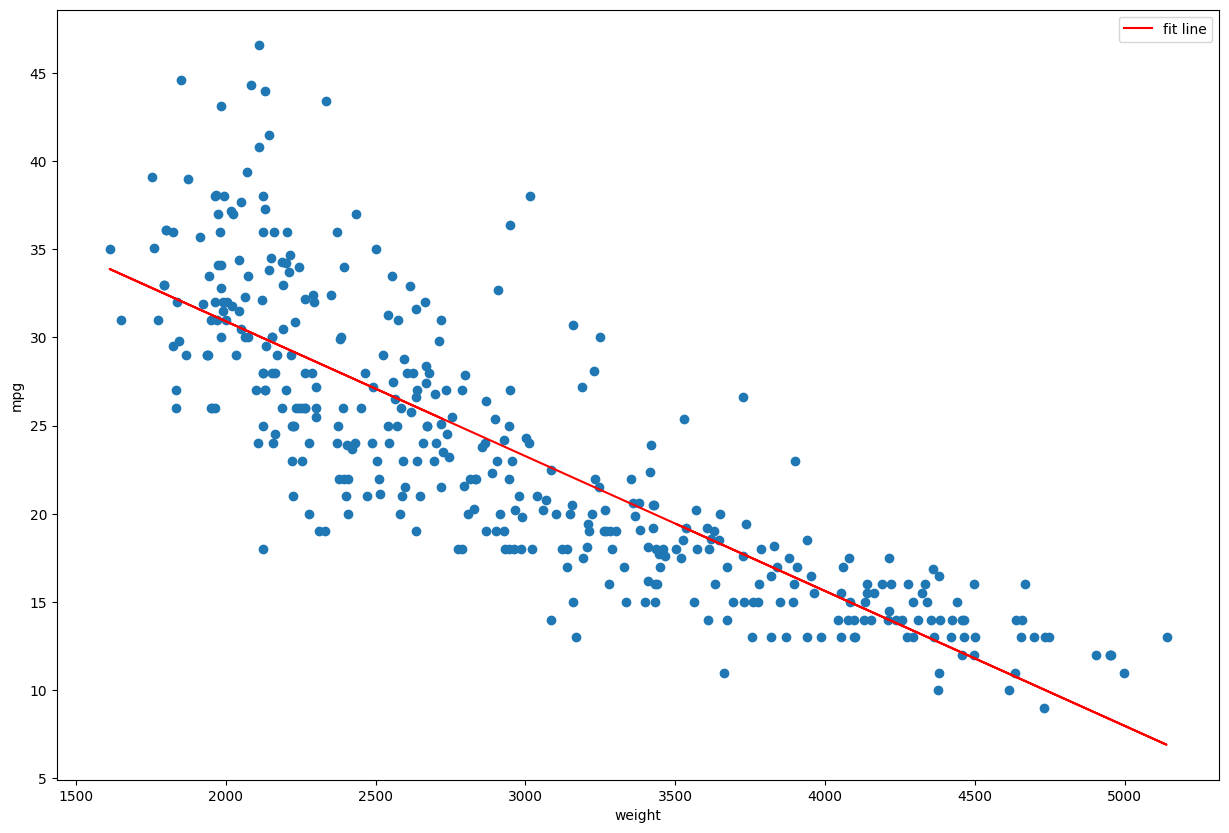

In [ ]:
plt.figure(figsize = (15,10))


plt.scatter(X, Y)
plt.plot(X, Y_pred1, color='red', label="fit line")
plt.xlabel("weight")
plt.ylabel("mpg")

plt.legend()

plt.show()

#### Thought question:

How you think the regression model picks the line?  That is, how does it decide what slope and interecept to estimate?



# STOP HERE! 🛑

## Multi-Linear Regression

You might have guessed that that some of the other features in the data-set might also be predictive of mpg. Indeed, several columns seem likely to predict mpg.  And this gives rise to the idea of multi-linear regression, which takes the form:

$$Y = \alpha + \beta_1 X_1 + \beta_2 X_2 + \cdots + \beta_k X_k + \epsilon$$

Here, one has $k$ features $X_1,.., X_k$, all of which may be used together to predict $Y$


We can easily fit this is sklearn as follows:


In [ ]:
Auto.columns  # I am just reminding myself the column names.

Index(['name', 'mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin'],
      dtype='object')

In [ ]:
predictors = ['cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration']   # These will play the roles of X1, X2, etc

X2 = Auto[predictors].values
Y = Auto["mpg"].values.reshape(-1, 1)
linear_regressor2 = LinearRegression()
linear_regressor2.fit(X2, Y)  # This estimates the coefficients


Y_pred2 = linear_regressor2.predict(X2)  # This predicts the mpg given the other information

### Model Assessment

For a regression model, how can we decide whether a model is working? Or whether one model does "better" than another model?  

One very common way to do this is to use $R^2$.  $R^2$ compares the Sum of Squared Errors using a the b ase model $y = \bar{y}$ (every point is predicted to be the average) against the predicitons of the given model $M$.    Speficially, it takes the ratios of $SSE$s and subtracts from $1$:


$$R^2 = 1 - \frac{SSE_M}{SSE_0}$$

If the model greatly reduces the error, the $R^2$ will be close to $1$ (good).   If the model improves little, the $R^2$ is close to $0$ (bad).   

Let's calculate the $R^2$ for the two different regressions we have performed so far.



In [ ]:
# Model 1


model0_error = (Y.mean() - Y)

model1_error = (Y_pred1 - Y)


SSE0 = np.sum(model0_error**2)
SSE1 = np.sum(model1_error**2)

print("The R^2 for model 1 is ", 1 - SSE1/SSE0)


The R^2 for model 1 is  0.6926304331206254


Statistications will that model 1 "explains" $69.3 \%$ of the variance.

In [ ]:
# Model 2


model2_error = (Y_pred2 - Y)
SSE2 = np.sum(model2_error**2)

print("The R^2 for model 2 is ", 1 - SSE2/SSE0)

The R^2 for model 2 is  0.7076926326770516


This is a modest improvement (at best).


#### Exercise

Instead of just throwing all the other variables, try creating a new variable that is $weight^2$

You can start by creating a new column as follows.

In [ ]:
Auto["wtsqrd"] = Auto["weight"]**2


See if you can fit this model and calculate the $R^2$

# STOP HERE! 🛑

## Logistic Regression

Linear regression *can* work great for predicting a number (a regression problem).  But what about *classification*?

This can be done, but not without an important modification.  Let's take a look at some data about Penguins.





In [ ]:
penguins = pd.read_csv('https://raw.githubusercontent.com/sziccardi/MLCamp2025_DataRepository/main/penguins.csv')

penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,male
1,Adelie,Torgersen,39.5,17.4,186,3800,female
2,Adelie,Torgersen,40.3,18.0,195,3250,female
3,Adelie,Torgersen,36.7,19.3,193,3450,female
4,Adelie,Torgersen,39.3,20.6,190,3650,male


Now, there are lots of things we could try to do here, but our case, we will attempt to predict "sex" based on the other features.

Since some of our features are categorial as is the target or response variable, we will use the get_dummies method.


In [ ]:
penguins2 = pd.get_dummies(penguins, drop_first=True, dtype='int')  # drop_first=True, means that we don't have a redudant columns. Try setting it to FALSE and see.
penguins2

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen,sex_male
0,39.1,18.7,181,3750,0,0,0,1,1
1,39.5,17.4,186,3800,0,0,0,1,0
2,40.3,18.0,195,3250,0,0,0,1,0
3,36.7,19.3,193,3450,0,0,0,1,0
4,39.3,20.6,190,3650,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...
328,55.8,19.8,207,4000,1,0,1,0,1
329,43.5,18.1,202,3400,1,0,1,0,0
330,49.6,18.2,193,3775,1,0,1,0,1
331,50.8,19.0,210,4100,1,0,1,0,1


** Questions

1. What is the "sex" if sex_male = 0?
2. What is the Species if both species_Chinstrap and species_Gentoo are 0?



We now "fit" a linear model to this:

In [ ]:
predictors = penguins2.columns[0:-1] # Don't include the last column.

X = penguins2[predictors].values  #
Y = penguins2["sex_male"].values.reshape(-1, 1)
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)

And plot the result

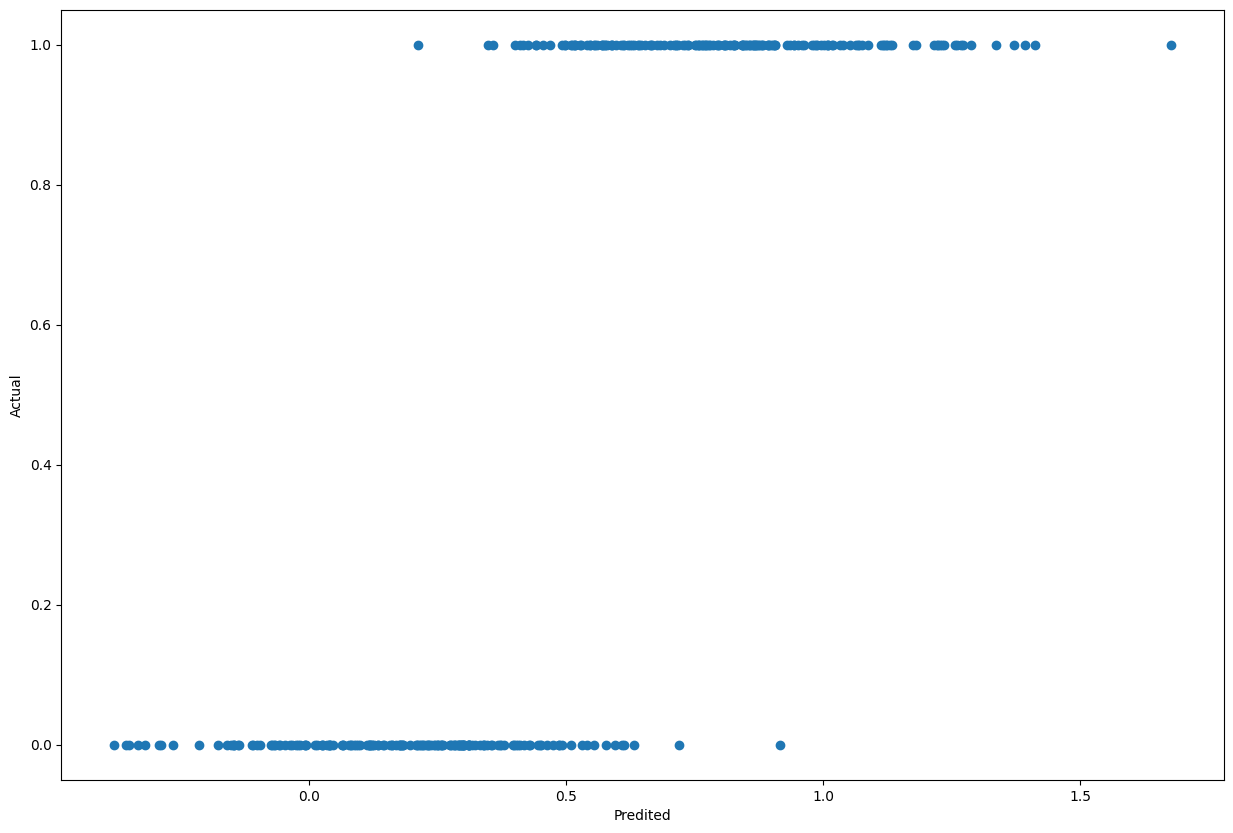

In [ ]:
plt.figure(figsize = (15,10))


plt.scatter(Y_pred, Y)
plt.xlabel("Predited")
plt.ylabel("Actual")


plt.show()

We can see the problem here.  What do the predicted numbers really mean? Intuitively, "bigger" means more likely to default, but we don't know where to make the cut off nor how to assign a probability to the numbner returned.

On the other hand, linear regression is cool and statisticians (and others) love it.  How can we make it work?


### The trick

The trick is to transform the value that is output via the linear model into something that can be interpreted as a probability.  We then select the coefficients to best fit the oberved outcomes.  Mathematically, the model is as follows:


$$W = \alpha + \beta_1 X_1 + \beta_2 X_2 + \cdots + \beta_k X_k$$

where

$$\mathrm{Pr}(Y = 1) = \frac{e^W}{1+e^W} = \frac{1}{1 + e^{-W}}$$




This works because while $W$ can take values on the entire real line (that is, $W \in (-\infty, \infty))$,

the expression $$\frac{1}{1+e^{-W}}$$ is always between $0$ and $1$ (like a probability).

Let's plot this function



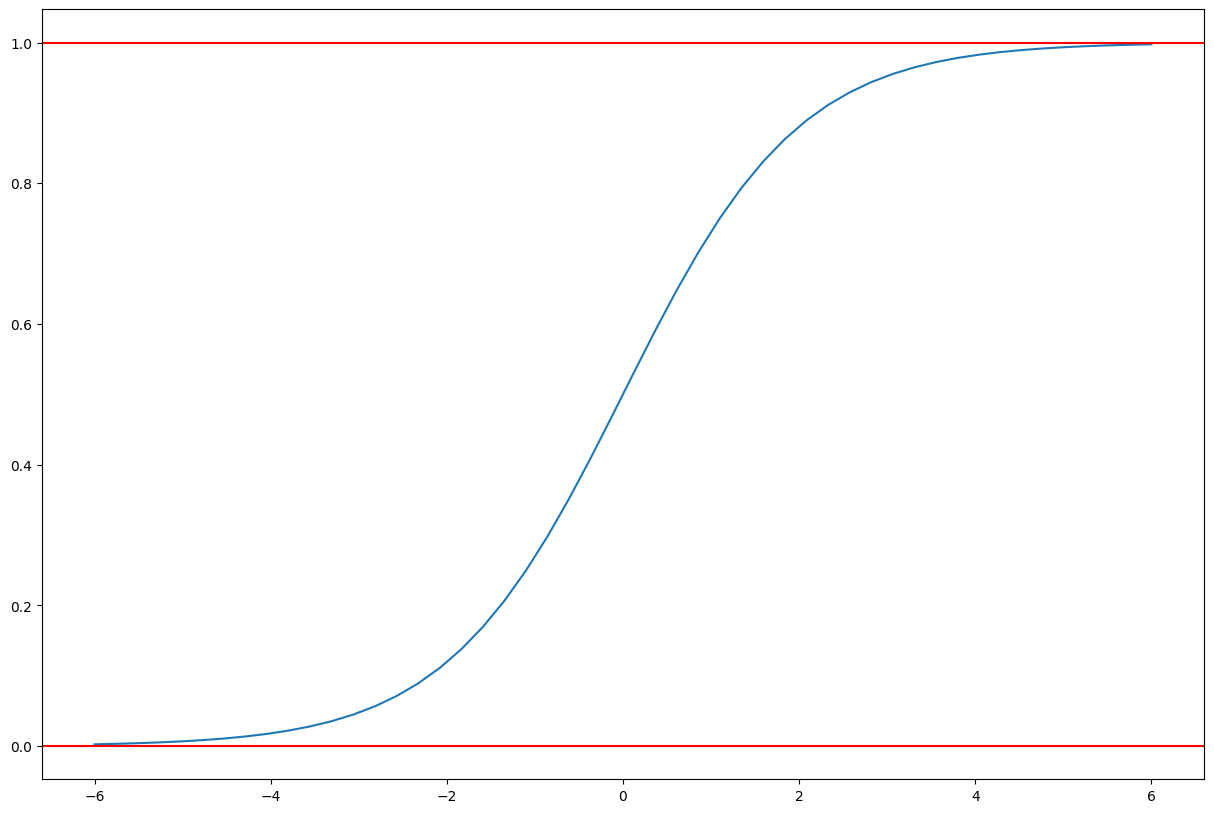

In [ ]:
xvals = np.linspace(-6,6)
f = lambda x: 1/(1+np.exp(-x))

plt.figure(figsize= (15,10))

plt.plot(xvals, f(xvals))

plt.axhline(0, color = "red")


plt.axhline(1, color = "red")


plt.show()

Note: The function $f(x) = \frac{1}{1+e^{-x}}$ is called the *logistic* function and is an example of a *sigmoid* function.  Sigmoid functions play an important role in neural networks.

Now let fit this using sklearn

In [ ]:
from sklearn.linear_model import LogisticRegression

logistic_regressor = LogisticRegression(max_iter = 10000)
logistic_regressor.fit(X, Y.ravel())  # This fits the model

LogisticRegression(max_iter=10000)

Once fit, we can use the model to predict the *probability* of female or male.

In [ ]:
Y_pred_prob = logistic_regressor.predict_proba(X)
Y_pred_prob[0:10,:]

array([[0.28370711, 0.71629289],
       [0.78230049, 0.21769951],
       [0.94769117, 0.05230883],
       [0.59904574, 0.40095426],
       [0.02333483, 0.97666517],
       [0.80123444, 0.19876556],
       [0.00125847, 0.99874153],
       [0.96376848, 0.03623152],
       [0.00469036, 0.99530964],
       [0.00107875, 0.99892125]])

The first column is the probabilty of "female", and the second is the probabilty of "male".

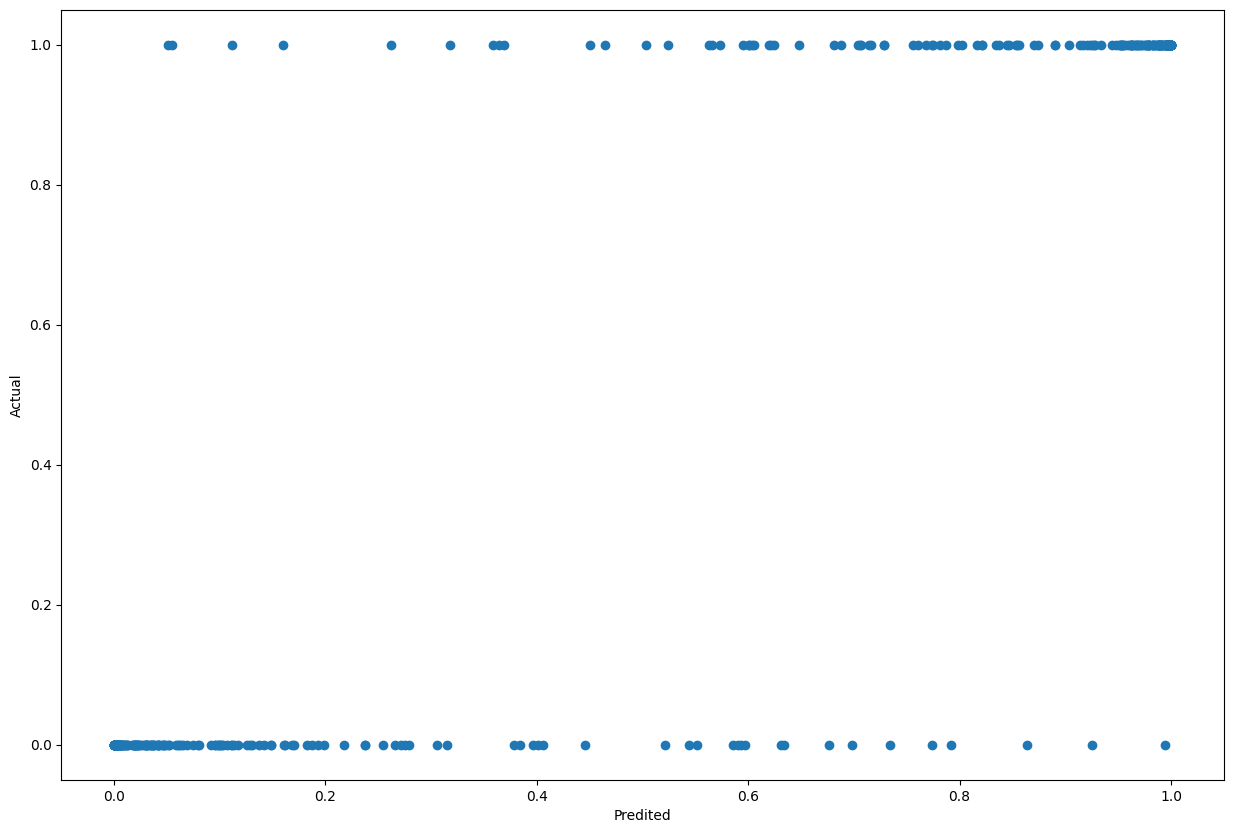

In [ ]:
plt.figure(figsize = (15,10))


plt.scatter(Y_pred_prob[:,1], Y)
plt.xlabel("Predited")
plt.ylabel("Actual")


plt.show()

We can see that there won't be a perfect prediciton form this, however, let's go ahead and predict "1" if the probability is greater than $0.5$ and $0$ otherwise.  That is the default when you use predict.



In [ ]:
Y_pred= logistic_regressor.predict(X)


In [ ]:
# How well did this work?

from sklearn.metrics import confusion_matrix

confusion_matrix(Y,Y_pred)

array([[148,  17],
       [ 11, 157]])

OR, if we want to know the values as percentage of all penguins:

In [ ]:
confusion_matrix(Y,Y_pred, normalize = 'all')

array([[0.44444444, 0.05105105],
       [0.03303303, 0.47147147]])

# STOP HERE! 🛑

## Soft-max

What about classifications problems where the predicted class is non-binary?    Say for example you have three classes.  One way to predict following the logsitic regression paradigm is perform two regressions relative to a reference level.  For example, suppose we are predicting "Red", "Green", or "Blue" and we make the reference level "Red".

We fit two linear models:

$$W_1 = \alpha_1 + \beta_{1,1} X_1 + \beta_{1,2} X_2 + \cdots + \beta_{1,k} X_k$$

and

$$W_2 = \alpha_2 + \beta_{2,1} X_1 + \beta_{2,2} X_2 + \cdots + \beta_{2,k} X_k$$

where we then have:

$$\mathrm{Pr}(Y = "Green") = \frac{e^{W_1}}{1+ e^{W_1}+e^{W_2}}\\
\mathrm{Pr}(Y = "Blue") = \frac{e^{W_2}}{1+e^{W_1}+e^{W_2}}$$

and for completeness

$$\mathrm{Pr}(Y = "Red") = 1 - \mathrm{Pr}(Y = "Green") - \mathrm{Pr}(Y = "Blue")\\
= \frac{1}{1+e^{W_1}+e^{W_2}}$$





#### Note

The functions

$$f^i(w_1, w_2,...,w_n) = \frac{e^{w_i}}{1 + e^{w_1} + e^{w_2} + \cdots + e^{w_n}}$$ are called *soft-max* functions and are important in neural networks.







### Example

Let's do this with the iris data set.





In [ ]:
iris_df = pd.read_csv('https://raw.githubusercontent.com/sziccardi/MLCamp2025_DataRepository/main/iris.csv')

iris_df.head()

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,species
0,0,5.1,3.5,1.4,0.2,setosa
1,1,4.9,3.0,1.4,0.2,setosa
2,2,4.7,3.2,1.3,0.2,setosa
3,3,4.6,3.1,1.5,0.2,setosa
4,4,5.0,3.6,1.4,0.2,setosa


In [ ]:
iris_df.to_csv("iris.csv")

We are going to predict species, but we need to first need to convert the "target" column to numbers.



In [ ]:
labels, unique = pd.factorize(iris_df['species'])
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
X = iris_df.iloc[:,0:4].values
y = labels

In [ ]:

mc_lr = LogisticRegression(multi_class='multinomial', solver='lbfgs')

mc_lr.fit(X, y)

mc_lr.predict_proba(X)[0:5,:]




/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[9.99377659e-01, 6.22340773e-04, 7.30049858e-15],
       [9.97779717e-01, 2.22028292e-03, 1.75210598e-14],
       [9.98178458e-01, 1.82154181e-03, 2.95079191e-14],
       [9.95647861e-01, 4.35213885e-03, 1.05591332e-13],
       [9.99158966e-01, 8.41034124e-04, 3.44708962e-14]])

How did we do?
                      
    

In [ ]:
preds = mc_lr.predict(X)
confusion_matrix(y,preds)

array([[50,  0,  0],
       [ 0, 50,  0],
       [ 0,  0, 50]])